# Introduction to Pandas

In [1]:
import pandas as pd

![](https://pandas.pydata.org/docs/_images/01_table_dataframe1.svg)

In [4]:
df = pd.DataFrame({
        "Name": ["Braund, Mr. Owen Harris",
                 "Allen, Mr. William Henry",
                 "Bonnell, Miss. Elizabeth"],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"]})

In [5]:
df

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


In [6]:
df['Name']

0     Braund, Mr. Owen Harris
1    Allen, Mr. William Henry
2    Bonnell, Miss. Elizabeth
Name: Name, dtype: object

In [7]:
type(df['Name'])

pandas.core.series.Series

In [8]:
df['Age'].max()

58

In [9]:
df['Age'].mean()

38.333333333333336

In [11]:
df.describe(include = 'all')

,Name,Age,Sex
count,3,3.000000,3
unique,3,NaN,2
top,"Bonnell, Miss. Elizabeth",NaN,male
freq,1,NaN,2
mean,NaN,38.333333,NaN
std,NaN,18.230012,NaN
min,NaN,22.000000,NaN
25%,NaN,28.500000,NaN
50%,NaN,35.000000,NaN
75%,NaN,46.500000,NaN


### Selecting Rows and Columns

In [12]:
import seaborn as sns

In [13]:
titanic = sns.load_dataset('titanic')

In [15]:
type(titanic)

pandas.core.frame.DataFrame

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [17]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
titanic['pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [20]:
column_names = ['pclass', 'age']
titanic[column_names]

,pclass,age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


In [21]:
titanic.loc[:, column_names]

,pclass,age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


In [22]:
titanic['age'] < 30

0       True
1      False
2       True
3      False
4      False
       ...  
886     True
887     True
888    False
889     True
890    False
Name: age, Length: 891, dtype: bool

In [23]:
titanic.loc[titanic['age'] < 30]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [24]:
titanic.loc[(titanic['age'] < 30) & (titanic['pclass'] == 1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
23,1,1,male,28.00,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,19.00,3,2,263.0000,S,First,man,True,C,Southampton,no,False
34,0,1,male,28.00,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
83,0,1,male,28.00,0,0,47.1000,S,First,man,True,NaN,Southampton,no,True
88,1,1,female,23.00,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
97,1,1,male,23.00,0,1,63.3583,C,First,man,True,D,Cherbourg,yes,False
102,0,1,male,21.00,0,1,77.2875,S,First,man,True,D,Southampton,no,False
118,0,1,male,24.00,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
136,1,1,female,19.00,0,2,26.2833,S,First,woman,False,D,Southampton,yes,False
139,0,1,male,24.00,0,0,79.2000,C,First,man,True,B,Cherbourg,no,True


### More Pandas Functions

In [25]:
titanic.sort_values('age')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [26]:
titanic.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [29]:
titanic.iloc[800:820, :3].head(2)

,survived,pclass,sex
800,0,2,male
801,1,2,female


In [31]:
titanic.nlargest(10, 'age').value_counts('sex')

sex
male    10
dtype: int64

In [32]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [33]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

<AxesSubplot:>

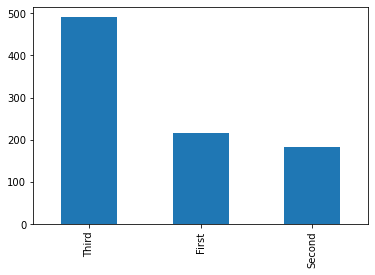

In [34]:
titanic['class'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

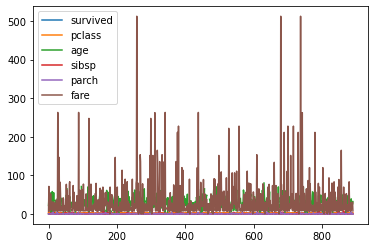

In [36]:
titanic.plot()

### Accessing Data

In [38]:
schools = pd.read_json('https://data.cityofnewyork.us/resource/xiyj-m4sj.json')

In [39]:
type(schools)

pandas.core.frame.DataFrame

In [40]:
schools.head(3)

,dbn,school_name,school_type,parent_response_rate,teacher_response_rate,student_response_rate,total_safety_and_respect,total_communication_score,total_engagement_score,total_academic_expectations
0,dbn,locationname,NA,rr_p,rr_t,rr_s,saf_tot_12,com_tot_12,eng_tot_12,aca_tot_12
1,01M015,P.S. 015 Roberto Clemente,Elementary School,61%,92%,NA,8.4,8.2,8.3,8.2
2,01M019,P.S. 019 Asher Levy,Elementary School,92%,94%,NA,8.4,8.0,8.0,8.2


In [41]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   dbn                          1000 non-null   object
 1   school_name                  1000 non-null   object
 2   school_type                  1000 non-null   object
 3   parent_response_rate         1000 non-null   object
 4   teacher_response_rate        1000 non-null   object
 5   student_response_rate        1000 non-null   object
 6   total_safety_and_respect     1000 non-null   object
 7   total_communication_score    1000 non-null   object
 8   total_engagement_score       1000 non-null   object
 9   total_academic_expectations  1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB
